In [18]:
import torch
import numpy
import torch.nn as nn
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio 
import io
from gif_util import *

In [19]:
def linear_function(x):
    return x
def square_function(x):
    return x ** 2
def cube_function(x):
    return x ** 3
def fourth_function(x):
    return x ** 4
def fifth_function(x):
    return x ** 5
def tan_function(x):
    return torch.tan(x)
def cos_function(x):
    return torch.cos(x) 

test_functions = [['Linear Function', linear_function], ['Square Function', square_function], ['Cube Function', cube_function], ['Fourth Function', fourth_function], ['Fifth Function', fifth_function], ['Tangent Function', tan_function], ['Cosine Function', cos_function]]

In [20]:
def get_gif(embed_dim, num_epochs, file_name, function_list):
    model = LQR(embed_dim)
    train_data, test_data, super_data, range_1_values, range_1_actual, range_2_values, range_2_actual, range_1_mask, range_2_mask = get_all_data(function_list)
    make_gif(model,embed_dim, num_epochs, super_data, train_data, file_name, range_1_values, range_1_actual, range_2_values, range_2_actual, range_1_mask, range_2_mask)

In [21]:
def neg_x_squared(x):
    return -1 * (x ** 2)
name = 'Negative X Squared'
get_gif(64,100,name,[neg_x_squared])

In [4]:
for function in test_functions:
    get_gif(512, 100, function[0], [function[1]])

In [16]:
def mountain_car_transition(x,v): #try plugged in x's and v's
    force = 0.5
    power = 0.0015
    v_ =  v + force * power - 0.0025 * torch.cos(3 * x)
    x = x + v_
    return x

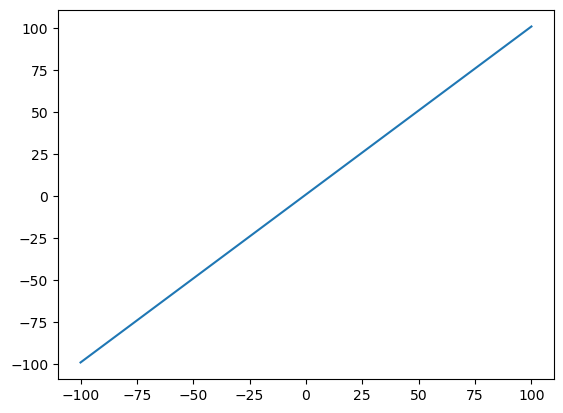

In [17]:
#plot mount_car_transition on linspace
x = torch.linspace(-100, 100, 10000)
y = []
for i in x:
    y.append(mountain_car_transition(i, 1))
y = torch.tensor(y)
plt.plot(x, y)
plt.show()

In [4]:
get_gif(512,100, "x cubed", [square_function])

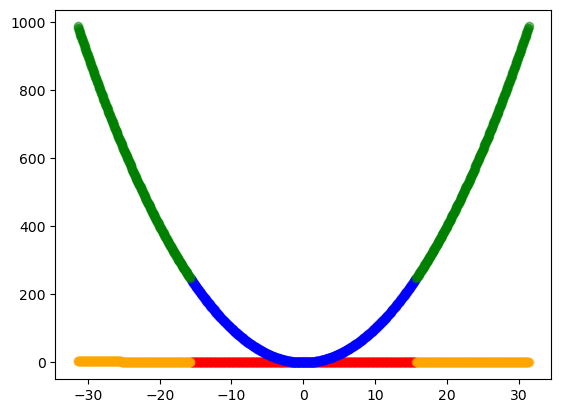

In [16]:
# model = LQR(64)
# #Immediately test on supervalues
# outputs = []
# with torch.no_grad():
#     for x, y in super_data:
#         lqr_x_prime, x_prime_expanded, xx = model(x.unsqueeze(0))
#         outputs.append(lqr_x_prime)
# outputs = torch.tensor(outputs)

# plt.scatter(
#     range_1_values, 
#     outputs[range_1_mask], 
#     c='r', alpha=0.5, label="Predicted (Training Range)"
# )
# plt.scatter(
#     range_1_values, 
#     range_1_actual, 
#     c='b', alpha=0.5, label="Actual (Training Range)"
# )

# plt.scatter(
#     range_2_values, 
#     outputs[range_2_mask], 
#     c='orange', alpha=0.5, label="Predicted (Unseen Range)"
# )
# plt.scatter(
#     range_2_values, 
#     range_2_actual, 
#     c='green', alpha=0.5, label="Actual (Unseen Range)"
# )
# plt.show()